<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/VisualizingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTS:

In [1]:
import numpy as np
import tensorflow as tf
import random
import math
from matplotlib import pyplot as plt

Creating the data:

In [2]:
x = np.array([[random.random()*100+20, random.random()*-100+20, random.random()*10-10, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()-1] for _ in range(10000)] + [[random.random()*100-120, random.random()*-100-120, random.random()*50+10, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()+1] for _ in range(10000)])
y = np.array([0 for _ in range(10000)] + [1 for _ in range(10000)])

print(x.shape)
print(y.shape)

print(x)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

(20000, 9)
(20000,)
[[ 8.72199093e+01 -4.56495869e+01 -6.66570621e+00 ...  4.33414638e-03
   3.00000000e+00 -4.57794013e-01]
 [ 9.51840627e+01 -3.82624387e+01 -9.27973219e+00 ...  9.45488209e-01
   3.00000000e+00 -7.44521250e-01]
 [ 2.80609772e+01 -8.48979418e+00 -7.99851694e+00 ...  1.22375504e-02
   3.00000000e+00 -7.96632891e-01]
 ...
 [-1.07892648e+02 -2.04619720e+02  5.90859263e+01 ...  5.85240003e-01
   3.00000000e+00  1.77317158e+00]
 [-3.69658345e+01 -1.42241299e+02  5.04641114e+01 ...  2.62543116e-01
   3.00000000e+00  1.13525870e+00]
 [-1.19361140e+02 -1.53560911e+02  5.47063815e+01 ...  8.90080621e-01
   3.00000000e+00  1.84421732e+00]]


## MODEL:

In [3]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(7, activation='sigmoid', input_shape=(x.shape[1],)),
                                    tf.keras.layers.Dense(5, activation='sigmoid'),
                                    tf.keras.layers.Dense(2, activation='sigmoid'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=50, validation_split=0.2, verbose=0)
model.evaluate(x, y)

625/625 [==============================] - 1s 1ms/step - loss: 8.0296e-06 - accuracy: 1.0000


[8.029592208913527e-06, 1.0]

## CREATING INDIVIDUAL BASIS CLASS:

In [4]:
class NueralNetVisualizer:
  def __init__(self, X, model):
    self.X = X
    self.model = model
    self.layer_wise_output_values = None
    self.model_weights = model.get_weights()
    self.activations = None
    self.img = None
  
  def layer_wise_output(self):
    x = self.X
    output_names = [l.name for l in self.model.layers]
    self.model.outputs = [l.output for l in self.model.layers]
    self.model.build(input_shape=(x.shape[0],))
    output_values = self.model(np.array([x]))
    layer_name_to_output_value = dict(zip(output_names, output_values))
    
    self.layer_wise_output_values = [x]
    for key, item in layer_name_to_output_value.items():
      self.layer_wise_output_values.append(np.array(item[0]))

  def scoring_neurons_layerwise(self, layer_index):
    input = self.layer_wise_output_values[layer_index]
    weight = self.model_weights[layer_index*2]
    bias = self.model_weights[layer_index*2+1]
    output = self.layer_wise_output_values[layer_index+1]
    importance = []
    for index in range(weight.shape[1]):
      strengths = np.abs(input * weight.T[index] - bias[index])
      strengths = strengths - np.min(strengths)
      strengths = strengths/np.sum(strengths)
      importance.append(strengths)
    importance = np.array(importance)
    neuron_scores = np.mean(importance, axis=0)
    return neuron_scores
  
  def image_initializer(self):
    layers_len = len(self.layer_wise_output_values)
    max_neurons = max([layer.shape[0] for layer in self.layer_wise_output_values])
    return np.full((layers_len, max_neurons), -1.0)
    
  def add_to_image(self, neuron_scores, layer_index):
    right = (self.img.shape[1] - neuron_scores.shape[0])//2
    left = self.img.shape[1] - right -  neuron_scores.shape[0]
    img_row = np.array([-1.0 for _ in range(right)] + [val for val in neuron_scores] + [-1.0 for _ in range(left)])
    self.img[layer_index] = img_row    

  def draw_image(self):
    fig, ax = plt.subplots()
    cmap = plt.cm.viridis
    cmap.set_under(color='black')  
    ax.imshow(self.img, vmin=-0.01, vmax=1, cmap=cmap)
    for i in range(self.img.shape[0]):
        for j in range(self.img.shape[1]):
            ax.text(j, i, "{:.2f}".format(self.img[i,j]), ha="center", va="center")

  def iterating_through_layers(self):
    self.layer_wise_output()
    self.img = self.image_initializer()
    self.draw_image()
    for layer_index in range(len(self.model_weights)//2):
      neuron_scores = self.scoring_neurons_layerwise(layer_index)
      self.add_to_image(neuron_scores, layer_index)
      self.draw_image()
      plt.pause(0.01)
    output = self.layer_wise_output_values[layer_index+1]
    output = np.array([1 for _ in range(output.shape[0])])
    output = output/np.sum(output)
    self.add_to_image(output, layer_index+1)
    self.draw_image()
    plt.pause(0.01)
    plt.show()

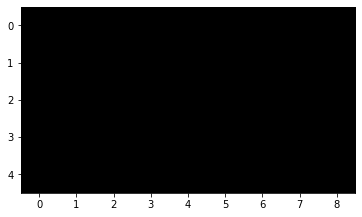

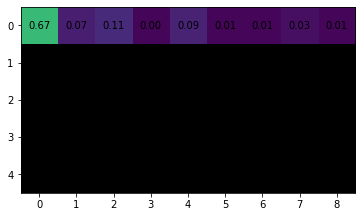

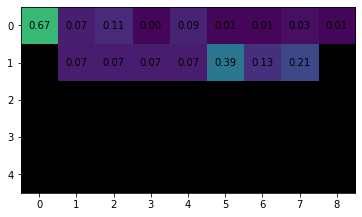

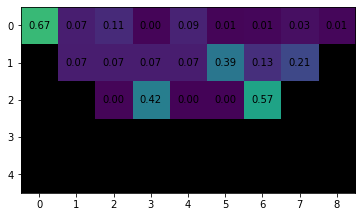

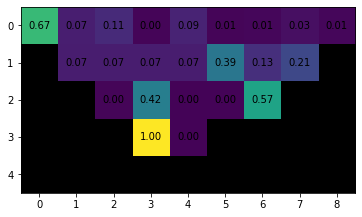

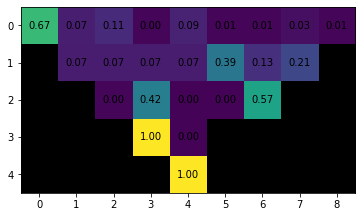

In [5]:
nnv = NueralNetVisualizer(x[1], model)
nnv.iterating_through_layers()

## LET US TAKE A LOOK AT ANOTHER EXAMPLE:

In [6]:
x = np.array([[random.random()*100+200, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()-1] for _ in range(10000)] + [[random.random()*-100-220, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()+1] for _ in range(10000)])
y = np.array([0 for _ in range(10000)] + [1 for _ in range(10000)])

print(x.shape)
print(y.shape)

print(x)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

(20000, 7)
(20000,)
[[ 2.61614846e+02  7.87559062e-01  1.00000000e+01 ...  9.27791958e-01
   3.00000000e+00 -9.34811543e-01]
 [ 2.50215772e+02  9.12747475e-01  1.00000000e+01 ...  7.45699806e-01
   3.00000000e+00 -5.07163292e-01]
 [ 2.18748684e+02  7.48696640e-01  1.00000000e+01 ...  6.57275958e-01
   3.00000000e+00 -3.48746964e-01]
 ...
 [-2.82319562e+02  2.84989630e-01  1.00000000e+01 ...  3.64138200e-01
   3.00000000e+00  1.96291303e+00]
 [-3.07007759e+02  6.09713161e-01  1.00000000e+01 ...  6.24000404e-01
   3.00000000e+00  1.95278773e+00]
 [-2.38487456e+02  5.13099909e-01  1.00000000e+01 ...  3.28503439e-01
   3.00000000e+00  1.64244289e+00]]


In [7]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(x.shape[1],)),
                                    tf.keras.layers.Dense(3, activation='sigmoid'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=100, validation_split=0.2, verbose=0)
model.evaluate(x, y)

625/625 [==============================] - 1s 1ms/step - loss: 1.8535e-08 - accuracy: 1.0000


[1.8534834111960663e-08, 1.0]

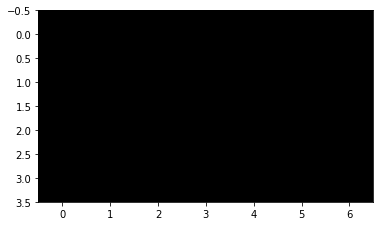

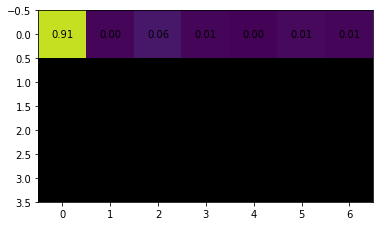

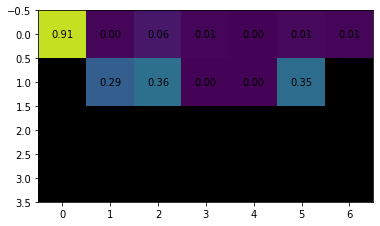

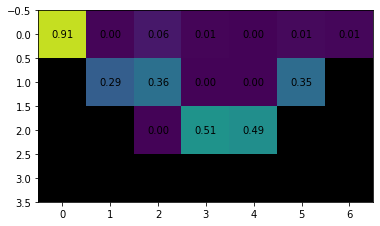

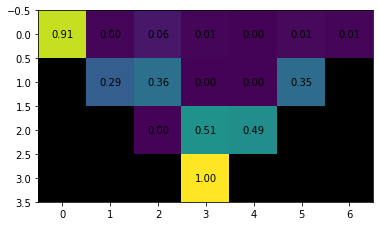

In [8]:
nnv = NueralNetVisualizer(x[0], model)
nnv.iterating_through_layers()